In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [13]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\cnt-first-project\feature_selection\training1.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,2,2008,8,4,5,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,5,2007,8,4,31,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,9,2008,8,4,7,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,0,0,0,0,2,2006,8,0,91,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,12,2008,8,4,8,250000


In [14]:
corr=df.corr()

In [15]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
SalePrice,-0.084284,-0.166872,0.334901,0.263843,0.041036,-0.255580,0.015453,-0.014314,-0.067396,0.051152,...,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,-0.054911,0.213092,-0.523350,1.000000
OverallQual,0.032628,-0.160099,0.234196,0.105806,0.058823,-0.190497,0.028907,-0.001881,-0.031086,-0.066450,...,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,-0.060472,0.193703,-0.572629,0.790982
GrLivArea,0.074853,-0.082615,0.368392,0.263116,0.044121,-0.175093,-0.068523,-0.008545,-0.089208,0.043860,...,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,-0.041480,0.080729,-0.200302,0.708624
GarageCars,-0.040110,-0.157042,0.269729,0.154871,-0.020025,-0.183906,0.045769,0.008161,-0.066967,-0.002683,...,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,-0.068295,0.184943,-0.538727,0.640409
GarageArea,-0.098672,-0.189250,0.323663,0.180403,-0.047794,-0.160639,0.047626,0.006372,-0.064023,0.004826,...,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,-0.090670,0.181284,-0.479408,0.623431
TotalBsmtSF,-0.238518,-0.087834,0.363358,0.260833,0.005068,-0.175782,0.005189,-0.014233,-0.040049,0.032498,...,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,-0.094983,0.110853,-0.391498,0.613581
1stFlrSF,-0.251758,-0.055614,0.414266,0.299475,0.005950,-0.172613,-0.042103,0.012287,-0.062414,0.068323,...,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,-0.118436,0.075893,-0.282143,0.605852
FullBath,0.131608,-0.198290,0.180424,0.126031,0.046471,-0.159390,0.050363,-0.026862,-0.007531,-0.046936,...,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,-0.035458,0.143864,-0.468403,0.560664
TotRmsAbvGrd,0.040380,-0.043200,0.320146,0.190015,0.046828,-0.119250,-0.053458,0.007769,-0.049246,-0.033768,...,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,-0.041252,0.070660,-0.096955,0.533723
YearBuilt,0.027850,-0.308908,0.117598,0.014228,0.021137,-0.226062,0.161622,-0.011505,0.013629,-0.073639,...,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,-0.052425,0.201044,-0.999036,0.522897


In [16]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [17]:
model=SVR()

In [18]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [19]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [20]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,59515.390105,88611.419190,-0.023683
1,11,59523.503382,88619.165647,-0.023862
2,12,59525.412347,88621.161258,-0.023908
3,13,59530.396665,88626.032389,-0.024021
4,14,59532.487646,88628.064281,-0.024068
...,...,...,...,...
105,115,59556.540420,88652.778677,-0.024639
106,116,59556.540420,88652.778677,-0.024639
107,117,59556.540420,88652.778677,-0.024639
108,118,59556.540420,88652.778677,-0.024639


In [21]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
0,10,59515.390105,88611.419190,-0.023683
1,11,59523.503382,88619.165647,-0.023862
2,12,59525.412347,88621.161258,-0.023908
3,13,59530.396665,88626.032389,-0.024021
4,14,59532.487646,88628.064281,-0.024068
...,...,...,...,...
108,118,59556.540420,88652.778677,-0.024639
83,93,59556.540420,88652.778677,-0.024639
84,94,59556.540420,88652.778677,-0.024639
75,85,59556.540420,88652.778677,-0.024639


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21000\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21000\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


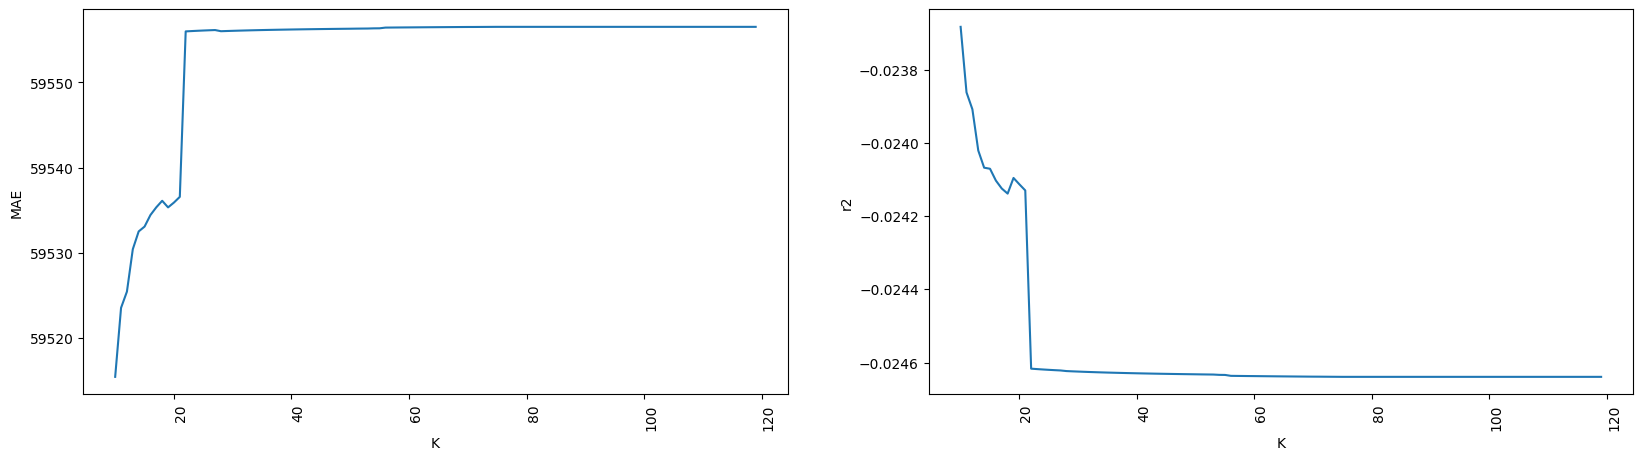

In [22]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [23]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass       1.788113e+03
MSZoning         3.991725e-01
LotFrontage      4.847253e+02
LotArea          9.955741e+07
Street           4.092700e-03
                     ...     
YrSold           1.762629e+00
SaleType         2.407365e+00
SaleCondition    1.211050e+00
Ageofhouse       9.144450e+02
SalePrice        6.306789e+09
Length: 75, dtype: float64

In [24]:
varr.loc[varr > 0.1].index

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'A

### 2.USING VarianceThreshold FROM SKLEARN

In [25]:
from sklearn.feature_selection import VarianceThreshold

In [26]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'A

In [27]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/1000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,59556.507292,88652.735400,-0.024638
1,101,59556.507292,88652.735400,-0.024638
2,102,59556.507292,88652.735400,-0.024638
3,103,59556.507292,88652.735400,-0.024638
4,104,59556.507292,88652.735400,-0.024638
...,...,...,...,...
395,495,59556.445860,88652.655179,-0.024636
396,496,59556.445860,88652.655179,-0.024636
397,497,59556.445860,88652.655179,-0.024636
398,498,59556.445860,88652.655179,-0.024636


In [28]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
399,499,59556.445860,88652.655179,-0.024636
382,482,59556.445860,88652.655179,-0.024636
383,483,59556.445860,88652.655179,-0.024636
384,484,59556.445860,88652.655179,-0.024636
385,485,59556.445860,88652.655179,-0.024636
...,...,...,...,...
96,196,59556.507292,88652.735400,-0.024638
95,195,59556.507292,88652.735400,-0.024638
94,194,59556.507292,88652.735400,-0.024638
92,192,59556.507292,88652.735400,-0.024638


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21000\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21000\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


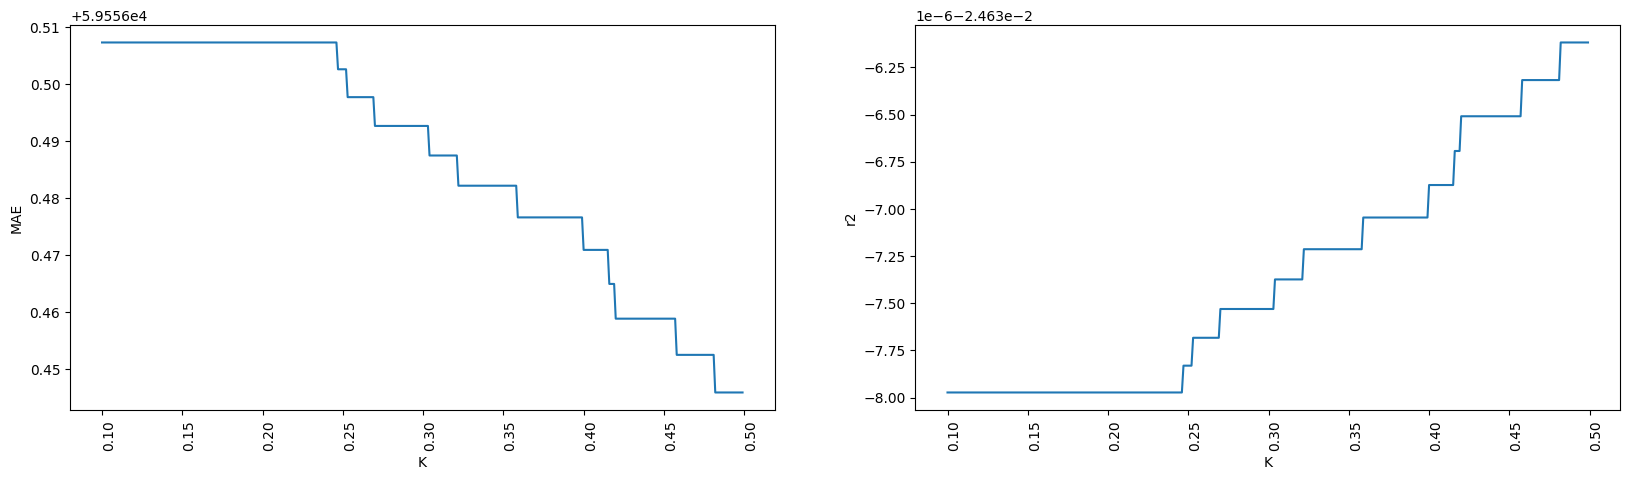

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


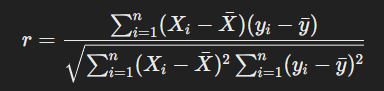

### Using numpy

In [30]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [31]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.7909816005838051


In [32]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

[['OverallQual', 0.7909816005838051],
 ['TotalBsmtSF', 0.6135805515591953],
 ['1stFlrSF', 0.6058521846919146],
 ['GrLivArea', 0.708624477612652],
 ['GarageCars', 0.640409197258352],
 ['GarageArea', 0.6234314389183616]]

### Using sklearn

In [33]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'], dtype=object)

In [34]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,59492.954374,88588.411759,-0.023152
1,6,59492.268759,88591.495070,-0.023223
2,7,59497.266219,88595.453783,-0.023314
3,8,59500.608379,88598.221917,-0.023378
4,9,59515.390105,88611.419190,-0.023683
...,...,...,...,...
110,115,59556.540420,88652.778677,-0.024639
111,116,59556.540420,88652.778677,-0.024639
112,117,59556.540420,88652.778677,-0.024639
113,118,59556.540420,88652.778677,-0.024639


In [35]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
1,6,59492.268759,88591.495070,-0.023223
0,5,59492.954374,88588.411759,-0.023152
2,7,59497.266219,88595.453783,-0.023314
3,8,59500.608379,88598.221917,-0.023378
4,9,59515.390105,88611.419190,-0.023683
...,...,...,...,...
113,118,59556.540420,88652.778677,-0.024639
87,92,59556.540420,88652.778677,-0.024639
88,93,59556.540420,88652.778677,-0.024639
79,84,59556.540420,88652.778677,-0.024639


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21000\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21000\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


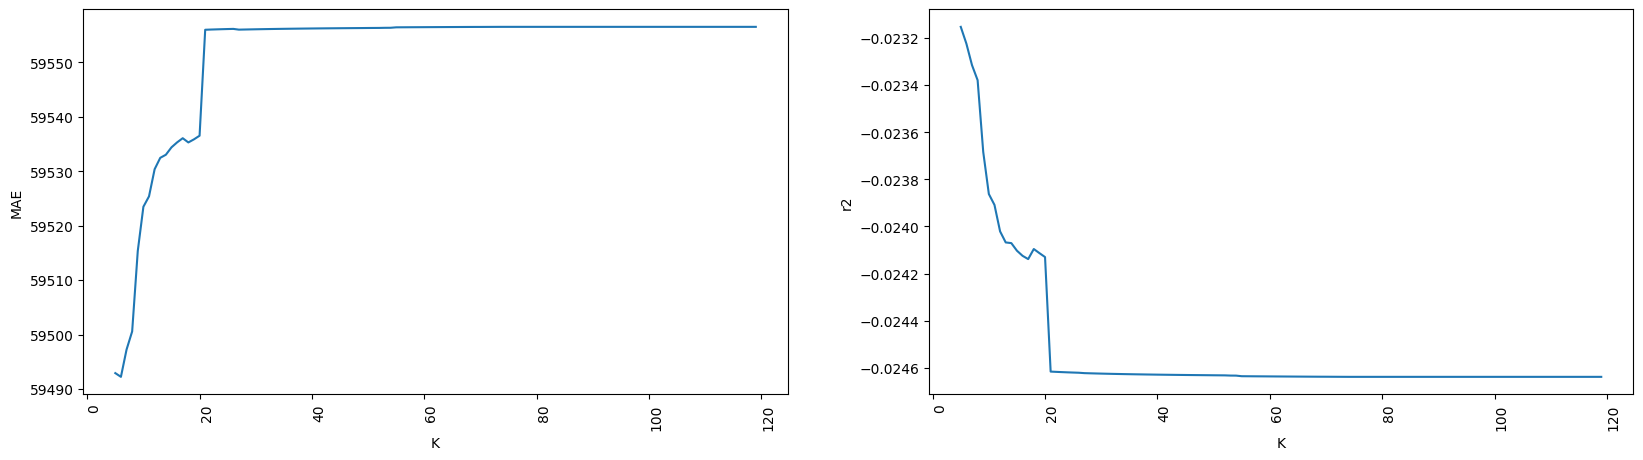

In [36]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

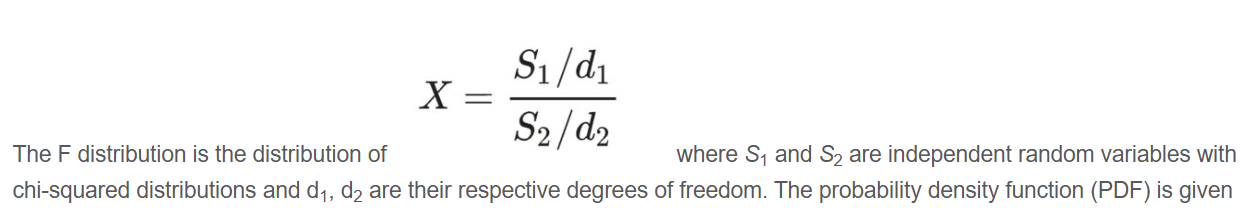

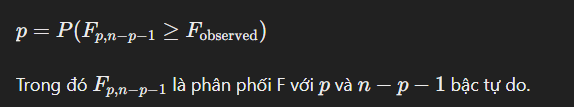

In [37]:
from sklearn.feature_selection import f_regression

In [38]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,59501.936827,88593.997972,-0.023281
1,6,59504.255257,88596.249089,-0.023333
2,7,59500.393616,88595.024482,-0.023304
3,8,59500.643642,88598.251568,-0.023379
4,9,59503.086653,88600.328698,-0.023427
...,...,...,...,...
110,115,59556.540420,88652.778677,-0.024639
111,116,59556.540420,88652.778677,-0.024639
112,117,59556.540420,88652.778677,-0.024639
113,118,59556.540420,88652.778677,-0.024639


In [39]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
2,7,59500.393616,88595.024482,-0.023304
3,8,59500.643642,88598.251568,-0.023379
0,5,59501.936827,88593.997972,-0.023281
4,9,59503.086653,88600.328698,-0.023427
1,6,59504.255257,88596.249089,-0.023333
...,...,...,...,...
113,118,59556.540420,88652.778677,-0.024639
87,92,59556.540420,88652.778677,-0.024639
88,93,59556.540420,88652.778677,-0.024639
79,84,59556.540420,88652.778677,-0.024639


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21000\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21000\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


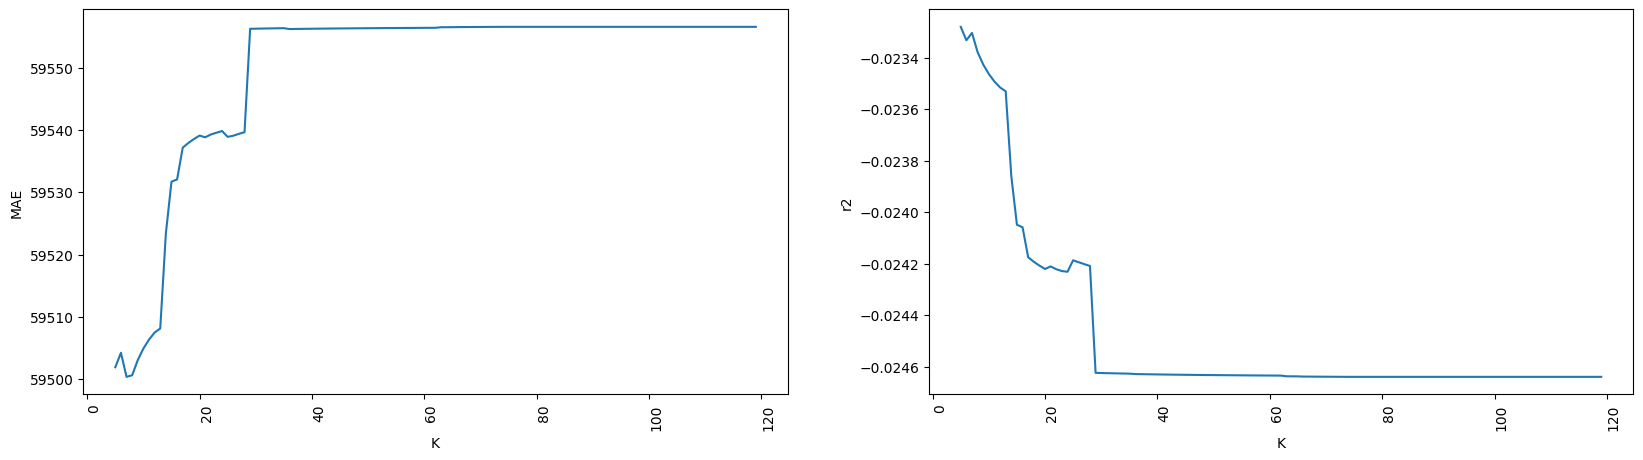

In [40]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

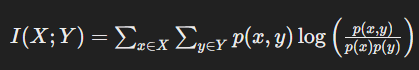

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

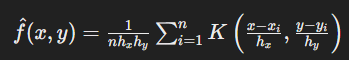

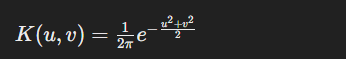

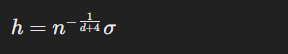

In [41]:
all_col=df.columns
all_col

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [42]:
from sklearn.feature_selection import mutual_info_regression

In [43]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,59512.617678,88606.772219,-0.023576
1,6,59518.581991,88612.655288,-0.023712
2,7,59515.984887,88609.974860,-0.023650
3,8,59519.260657,88613.242186,-0.023725
4,9,59521.197841,88615.258442,-0.023772
...,...,...,...,...
110,115,59556.540420,88652.778677,-0.024639
111,116,59556.540420,88652.778677,-0.024639
112,117,59556.540420,88652.778677,-0.024639
113,118,59556.540420,88652.778677,-0.024639


In [44]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [45]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
0,5,59512.617678,88606.772219,-0.023576
2,7,59515.984887,88609.974860,-0.023650
1,6,59518.581991,88612.655288,-0.023712
3,8,59519.260657,88613.242186,-0.023725
7,12,59521.137183,88616.907114,-0.023810
...,...,...,...,...
113,118,59556.540420,88652.778677,-0.024639
87,92,59556.540420,88652.778677,-0.024639
88,93,59556.540420,88652.778677,-0.024639
79,84,59556.540420,88652.778677,-0.024639


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21000\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_21000\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


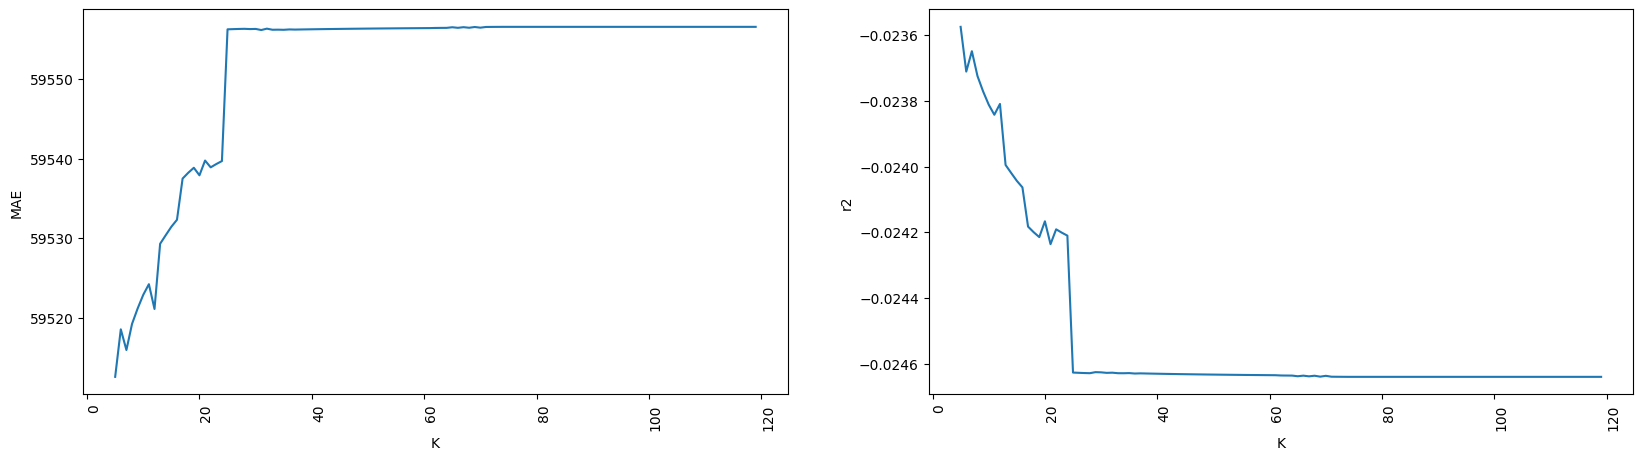

In [46]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [47]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,59492.954374,88588.411759,-0.023152
1,6,59492.268759,88591.495070,-0.023223
2,7,59497.266219,88595.453783,-0.023314
3,8,59500.608379,88598.221917,-0.023378
4,9,59515.390105,88611.419190,-0.023683
...,...,...,...,...
110,115,59556.540420,88652.778677,-0.024639
111,116,59556.540420,88652.778677,-0.024639
112,117,59556.540420,88652.778677,-0.024639
113,118,59556.540420,88652.778677,-0.024639


In [48]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,59501.936827,88593.997972,-0.023281
1,6,59504.255257,88596.249089,-0.023333
2,7,59500.393616,88595.024482,-0.023304
3,8,59500.643642,88598.251568,-0.023379
4,9,59503.086653,88600.328698,-0.023427
...,...,...,...,...
110,115,59556.540420,88652.778677,-0.024639
111,116,59556.540420,88652.778677,-0.024639
112,117,59556.540420,88652.778677,-0.024639
113,118,59556.540420,88652.778677,-0.024639


In [49]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,59512.617678,88606.772219,-0.023576
1,6,59518.581991,88612.655288,-0.023712
2,7,59515.984887,88609.974860,-0.023650
3,8,59519.260657,88613.242186,-0.023725
4,9,59521.197841,88615.258442,-0.023772
...,...,...,...,...
110,115,59556.540420,88652.778677,-0.024639
111,116,59556.540420,88652.778677,-0.024639
112,117,59556.540420,88652.778677,-0.024639
113,118,59556.540420,88652.778677,-0.024639


In [50]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,59492.954374,88588.411759,-0.023152,59501.936827,88593.997972,-0.023281
1,6,59492.268759,88591.495070,-0.023223,59504.255257,88596.249089,-0.023333
2,7,59497.266219,88595.453783,-0.023314,59500.393616,88595.024482,-0.023304
3,8,59500.608379,88598.221917,-0.023378,59500.643642,88598.251568,-0.023379
4,9,59515.390105,88611.419190,-0.023683,59503.086653,88600.328698,-0.023427
...,...,...,...,...,...,...,...
110,115,59556.540420,88652.778677,-0.024639,59556.540420,88652.778677,-0.024639
111,116,59556.540420,88652.778677,-0.024639,59556.540420,88652.778677,-0.024639
112,117,59556.540420,88652.778677,-0.024639,59556.540420,88652.778677,-0.024639
113,118,59556.540420,88652.778677,-0.024639,59556.540420,88652.778677,-0.024639


In [51]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,59492.954374,88588.411759,-0.023152,59501.936827,88593.997972,-0.023281,59512.617678,88606.772219,-0.023576
1,6,59492.268759,88591.495070,-0.023223,59504.255257,88596.249089,-0.023333,59518.581991,88612.655288,-0.023712
2,7,59497.266219,88595.453783,-0.023314,59500.393616,88595.024482,-0.023304,59515.984887,88609.974860,-0.023650
3,8,59500.608379,88598.221917,-0.023378,59500.643642,88598.251568,-0.023379,59519.260657,88613.242186,-0.023725
4,9,59515.390105,88611.419190,-0.023683,59503.086653,88600.328698,-0.023427,59521.197841,88615.258442,-0.023772
...,...,...,...,...,...,...,...,...,...,...
110,115,59556.540420,88652.778677,-0.024639,59556.540420,88652.778677,-0.024639,59556.540420,88652.778677,-0.024639
111,116,59556.540420,88652.778677,-0.024639,59556.540420,88652.778677,-0.024639,59556.540420,88652.778677,-0.024639
112,117,59556.540420,88652.778677,-0.024639,59556.540420,88652.778677,-0.024639,59556.540420,88652.778677,-0.024639
113,118,59556.540420,88652.778677,-0.024639,59556.540420,88652.778677,-0.024639,59556.540420,88652.778677,-0.024639


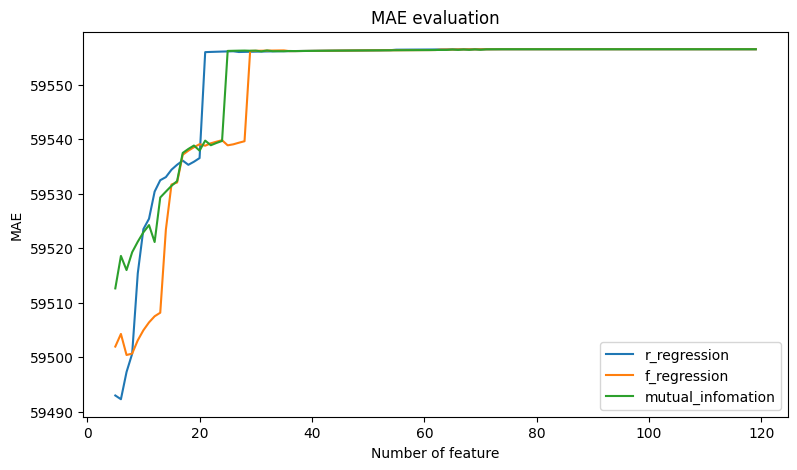

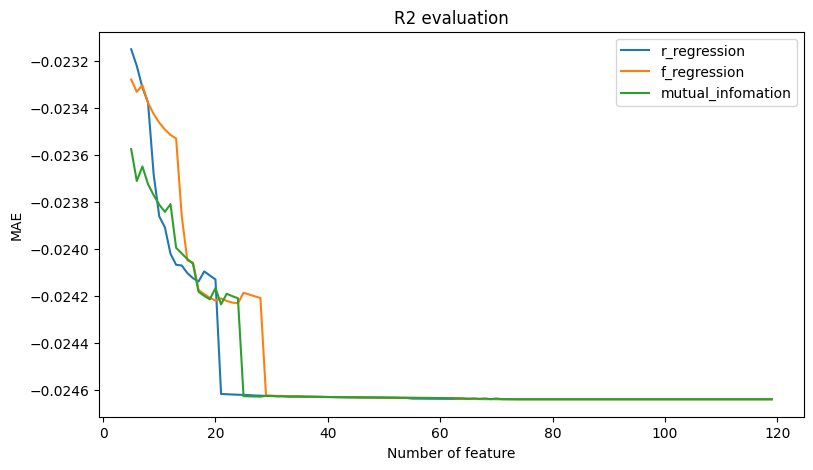

In [52]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()